### This assignment may be worked individually or in pairs. 
### Enter your name/names here:

In [ ]:
# Name(s) here

In [1]:
# headers
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to calculate adjusted r2
def get_adj_r2(r2, n, p):
    return (1-(1-r2)*((n-1)/(n-p-1)))

# Assignment 2: Regression and KNN classifier

## Part 1: Regression with scikit-learn

In this part of the assignment, you will fit a regression model to an insurance dataset using the scikit-learn package. 

The insurance company would like to be able to estimate the annual medical expenditures they will need to pay for any customer, based on the customer's age, sex, BMI, # of children, whether they are a smoker, and their region of residence. 

Estimates from this model can be used to then determine how much to charge each customer for insurance (the more we think you'll cost us, the more we will charge you).

**Data Prep**

Q1. Read the dataset from 'medical-charges.txt' into a Pandas Dataframe. Display the head of the dataset. There should be 1138 rows and 7 columns. The target column (y) is the `charges` column.

In [26]:
# your code goes here

data = pd.read_csv("medical-charges.txt")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q2. Notice that there are several categorical columns. You'll need to transform these to be able to do regression. Since `sex` and `smoker` are binary in this dataset, let's do them differently than `region` which has 4 options.

* Use the Pandas [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to one-hot-encode `sex` and `smoker`. 
* Since these features are binary, we do not need to create two columns for each of them (i.e. we do not need both smoker_yes and smoker_no - just having a smoker_yes column will be sufficient), so use the `drop_first` parameter of get_dummies to create only a `smoker_yes` and a `sex_male` column. 
* Display the head of the dataframe.

In [27]:
# your code goes here
data_dummy = pd.get_dummies(data, drop_first=True, columns=["sex", "smoker"])
data_dummy.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


Q3. Now one-hot encode the `region` feature by again using `get_dummies()`, but this time, even though we could drop one column, let's go ahead and explicitly keep all 4 values as columns (i.e. drop_first should be set to False). Display the head of the resulting dataframe.

In [28]:
# your code goes here
data_dummy = pd.get_dummies(data_dummy, columns=["region"])
data_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


Q4. An interesting thing to check with regression problems is whether any of the individual features correlate very strongly with the label. Use the `corr()` method on the dataframe to take a look at this.

Answer as a comment: Do you see any features with a strong correlation to the label?

In [7]:
# your code goes here
data_dummy.corr()

# Yes, the feature with the strongest correlation is the "smoker_yes" feature, with
# the second highest feature being "age". Out of the four regions, 
# region_southeast has the highest correlation. 

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


Q5. Create a plot to show the difference in charges between the smokers and the non-smokers. 

<AxesSubplot:xlabel='smoker_yes', ylabel='charges'>

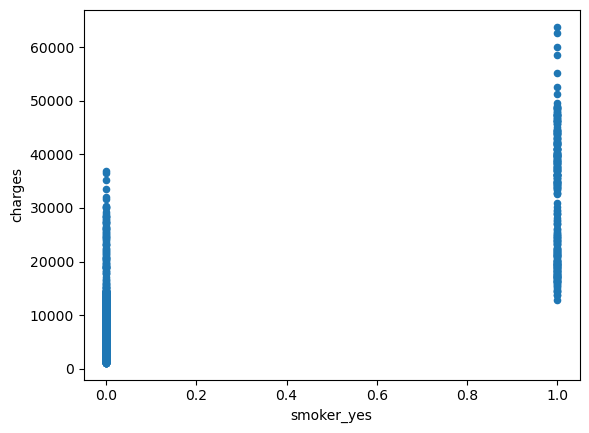

In [34]:
# your code goes here
data_dummy.plot(x="smoker_yes", y="charges", kind="scatter")

Q6. Let's explore the relationship between `age` and `charges`. Create a scatter plot of all data points to show age vs charges. 

Answer as a comment: What do you notice about the nature of this relationship?

<AxesSubplot:xlabel='age', ylabel='charges'>

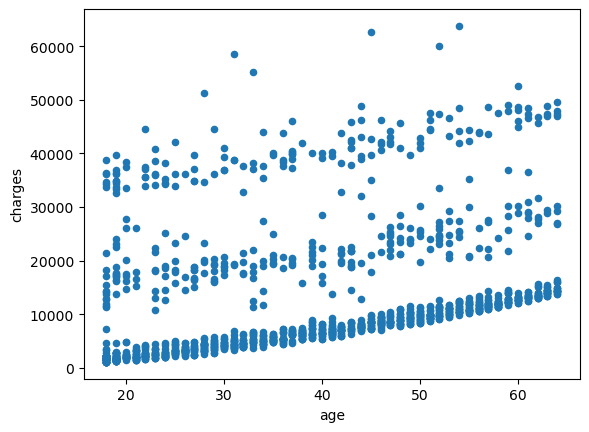

In [9]:
# your code goes here
data_dummy.plot(kind="scatter", x="age", y="charges")

# While there's a slight positive trend as age increases,
# the data for the most part is evenly distributed

#### Simple Linear Regression
**Fit a simple linear regression model to predict `charges` from `age`.**

Q7. 
* Grab the `age` column from the dataframe and call it something like `x`.
* Grab the `charges` column from the dataframe and call it something like `y`.
* When doing simple linear regression (one feature), you need to convert the features from a Series to a list of lists. You can do this by doing `x = x.values.reshape(-1,1)`, where the (-1,1) means (all rows, one column). 
* Do the same to the labels (`y = y.values.reshape(-1,1)`). 
* Verify that you have a list of lists for both x and y.

In [38]:
# your code goes here
x_age = data_dummy.age.values.reshape(-1,1)
y_charges = data.charges.values.reshape(-1,1)
print("Age: ", x_age)
print("Charges: ", y_charges)

Age:  [[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]
Charges:  [[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


**Using the holdout method**

Q8. Use [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split your dataset into training and test sets. Do an 80%-20% split. Display how many records are in the training set and how many are in the test set. Set the random_state argument to your favorite number.

In [130]:
from sklearn.model_selection import train_test_split

# your code goes here
age_train, age_test, charges_train, charges_test = train_test_split(x_age, y_charges, test_size=.20, random_state=999)
print(f"Age train size: {len(age_train)}, Age test size: {len(age_test)}, Charges train size: {len(charges_train)}, Chargest test size: {len(charges_test)}")


Age train size: 1070, Age test size: 268, Charges train size: 1070, Chargest test size: 268


Q9. 
* Create a [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object. 
* Call `fit` on it and pass in the training set.
* Print the slope and the intercept of the equation with the `.coef_` and `.intercept_` attributes. 

In [131]:
from sklearn.linear_model import LinearRegression

# your code goes here
reg = LinearRegression().fit(age_train, charges_train)
print(f"Slope: {reg.coef_}, Intercept: {reg.intercept_}")

Slope: [[264.9145888]], Intercept: [2753.14066488]


Q10. Now that you've fit the model on the training set, you can evaluate it on the test set. Call `predict` on the linear regression object and pass in the test set. Save the return value - these are all of the predicted values under the model for the test set. 

Compute some metrics to see how well this model fits the test data. Use `sklearn.metrics` to print out the MAE, MSE, RMSE, and R2 for the test set under this model. Remember that you have the actual y values for your test set, up in Q8.  

In [132]:
import sklearn.metrics as metrics

# your code goes here
predicted_values = reg.predict(age_test)

mae = metrics.mean_absolute_error(charges_test, predicted_values)
mse = metrics.mean_squared_error(charges_test, predicted_values, squared=True)
rmse = metrics.mean_squared_error(charges_test, predicted_values, squared=False)
r_two = metrics.r2_score(charges_test, predicted_values)


print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, r2: {r_two}")

MAE: 9196.569756881094, MSE: 137770531.1311487, RMSE: 11737.56921731023, r2: 0.062498020343770055


Q11. Let's see what the best fit line looks like with the test data. Scatter-plot the test data (x_test, y_test). Then line-plot the model predictions for the test data (x_test, y_test_preds). 

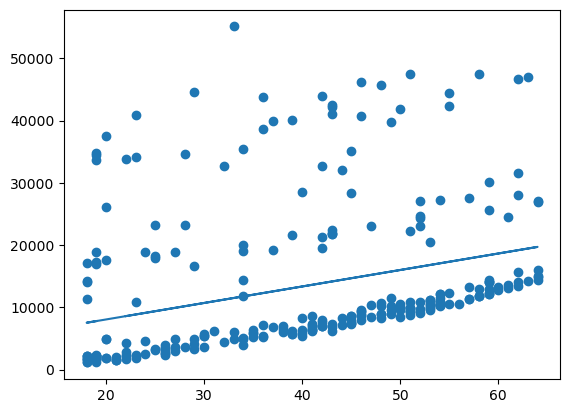

In [133]:
# your code goes here

plt.scatter(x=age_test, y=charges_test)
plt.plot(age_test, predicted_values)

Slope: [[238.37156961]], Intercept: [3882.85867889]


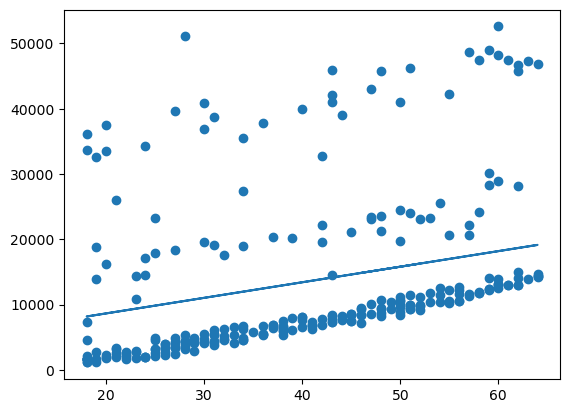

In [134]:
#meowdeletethislater
# your code goes here
age_train, age_test, charges_train, charges_test = train_test_split(x_age, y_charges, test_size=.20, random_state=0)

reg = LinearRegression().fit(age_train, charges_train)

predicted_values = reg.predict(age_test)

mae = metrics.mean_absolute_error(charges_test, predicted_values)
mse = metrics.mean_squared_error(charges_test, predicted_values, squared=True)
rmse = metrics.mean_squared_error(charges_test, predicted_values, squared=False)
r_two = metrics.r2_score(charges_test, predicted_values)

print(f"Slope: {reg.coef_}, Intercept: {reg.intercept_}")
plt.scatter(x=age_test, y=charges_test)
plt.plot(age_test, predicted_values)


Q12. Now, go back up to your Q8, change the random_state to a different number, and re-run Q9, Q10, Q11. 

Answer as a comment: What happened and why?

In [ ]:
# answer as a comment here
# I think we detected a really small change in the best fit line. 
# I say think because the change was so small it could have been our eyes playing tricks.

# Why? 
# Changing randomness in the model shows that there is little to no change in the model. 
# Slope and intercept only slightly change when the random_state is modified.

**Using cross-validation**

Q13. Use `sklearn.model_selection.cross_val_score` to perform 5-fold cross validation on a simple linear regression model. 

You will pass the FULL dataset (x and y from before the train/test split in Q8) into `cross_val_score` which will automatically divide it into the number of folds you tell it to, fit a linear regression model to the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the R2 on the test set for each fold. Average these R2 scores to print out the generalization estimate of the model.

On average, after 5 trials with 5 different test sets, this is how well we think a linear regression of using `age` to predict `charges` will work. 

In [68]:
from sklearn.model_selection import cross_val_score
import numpy as num
# your code goes here
score = cross_val_score(reg, x_age, y_charges)
print("Cross validation score:", num.average(score))

Cross validation score: 0.08821241573294032


#### Multiple Linear Regression
**Fit a multiple linear regression model to predict `charges` from `age` and `smoker`.**

Q14. Now let's see if we can get a better model by including another feature.
* From the one-hot-encoded dataframe (the result of Q3), grab both the `age` and `smoker_yes` columns. Call it something like x. 
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object. (Or you can re-use the one you already have.)
* Pass it all into a `sklearn.model_selection.cross_val_score` with a 5-fold CV.
* Print out the average R2.
* Once we get into **multiple** linear regression, we should not use R2, we should instead use adjusted-R2. Use the provided (at the top of the file) `get_adj_R2()` function to print out the adjusted R2. (Note, this value will be very close to the R2 because our `n` is large and our `p` is small.)

Answer as a comment: What happens when you include `smoker_yes`?

In [123]:
#double check when it is no longer 6 am 
# your code goes here
x_age_smoker = data_dummy[["age", "smoker_yes"]]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_age_smoker, y_charges, test_size=.20, random_state=0)
#reg2 = LinearRegression()#.fit(x_train2, y_train2)

score2 = cross_val_score(reg, x_age_smoker, y_charges)
print("Average R2:", num.average(score2))

adj_r_two_2 = get_adj_r2(num.average(score2), len(y_charges), 3)
print("Adjusted R2:", adj_r_two_2)

# When including smoker_yes, the R2 score significantly increases.

Average R2: 0.7191692504028052
Adjusted R2: 0.7185376969929165


Q15. Let's go one more step and see if including ALL of our features is even better at predicting the `charges` than using just `age` and `smoker`.

* From the one-hot-encoded dataframe (the result of Q3), grab all the features, but NOT the target. Call it something like x.
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new sklearn.linear_model.LinearRegression object. (Or you can re-use the one you already have.)
* Pass it all into a sklearn.model_selection.cross_val_score with a 5-fold CV.
* Print out the average R2 and the adjusted R2.

In [120]:
# your code goes here
x_all = data_dummy.loc[:, data_dummy.columns != 'charges']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_all, y_charges, test_size=.20, random_state=0)
#reg3 = LinearRegression().fit(x_train3, y_train3)
score3 = cross_val_score(reg, x_all, y_charges)
print("Average R2: ", num.average(score3))

adj_r_two_3 = get_adj_r2(num.average(score3), len(y_charges), 10)
print("Adjusted R2:", adj_r_two_3)

Average R2:  0.746861624347374
Adjusted R2: 0.7449540254351463


Q16. Build the final model on the entire dataset. 
* You should already have your x from the previous question (Q15).
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object, or you can re-use the one you already have.
* Call `fit` and pass in all the data (x, y).
* Print out the coefficients and the intercept of the fitted model. The coefficients correspond to the the order in which the features are in the dataframe (x).

This defines your multiple linear regression equation! 

In [135]:
# your code goes here
reg_final = LinearRegression().fit(x_all, y_charges)
print(f"Coefficients: {reg_final.coef_}, \nIntercept: {reg_final.intercept_}")

Coefficients: [[  256.85635254   339.19345361   475.50054515  -131.3143594
  23848.53454191   587.00923503   234.0453356   -448.01281436
   -373.04175627]], 
Intercept: [-12525.5478112]


## Part 2: K-Nearest Neighbors from scratch

In this part of the assignment you'll implement the K-Nearest Neighbors (KNN) classification algorithm to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees. 

You may use the following function to print a confusion matrix:

In [103]:
def print_confusion_matrix(TP, FN, FP, TN):
    
    table_data = [[TP,FN],[FP,TN]]
    df = pd.DataFrame(table_data, columns =['Predicted 1','Predicted 0'])
    df = df.rename(index={0: 'Actual 1', 1: 'Actual 0'})
    display(df)

In [104]:
# you may use these constants if you want
LABEL_COLUMN = 19
BINARY_COLUMNS = {0,1,18}

Q1. Normalize the data so that each feature value lies between `[0-1]`.

In class, we talked about why scaling the data is critical to KNN. We also talked about how data scaling should be done *inside the cross validataion loop*. This means that the scaling parameters should be based on the **training set only**, in order to prevent data leakage. Then the test data will need to be scaled, using the parameters found on the **training** data.

Fill in the function to take in a training dataset and a test dataset and normalize them correctly. Return the normalized datasets.

Caution: Return NEW datasets that have been normalized - do not normalize the datasets in-place, so that this can be run numerous times without altering the original data or normalizing already normalized data.

Hint: When using dataframes, you can do this without a loop!

In [163]:
def normalize_data(train, test):
    # your code goes here
    train_norm = train.copy(deep=True)
    test_norm = test.copy(deep=True)
    # (x - min(x)) / (max(x) - min(x))
    train_norm = train_norm.apply(lambda col: ((col - col.min()) / (col.max() - col.min())))
    test_norm = test_norm.apply(lambda col: ((col - col.min()) / (col.max() - col.min())))
   # print("train:", train_norm)
   # print("test:", test_norm)
    return train_norm, test_norm

Q2. The distance calculation method is central to the KNN algorithm. In this assignment you'll be using the Euclidean distance. 

Implement a function that takes in one data point (as a list), and the training data (as a dataframe), and calculates the Euclidian distance from the single data point to each of the data points in the training data.

You may return these however you want (or may add them to the dataframe?).

Hint: 
For KNN, the distance calculations are the most time-consuming part of the algorithm. Even though computing Euclidian distance seems like a simple, and therefore quick, calculation, running it thousands of times, inside of a nested 5-fold cross-validation for example, can cause this algorithm to take a very long time to run, depending on your implementation. 

Remember, you almost never need to loop a Dataframe! Pandas DataFrames have been specifically optimized for fast operations on large datasets, by [vectorizing](https://www.quantifisolutions.com/vectorization-part-2-why-and-what) calculations across all rows at once.

If you use a DataFrame, you should not write a loop to calculate each of the Euclidian distances one at a time. Look at [this post](https://stackoverflow.com/questions/46908388/find-euclidean-distance-from-a-point-to-rows-in-pandas-dataframe?rq=1) for more info.

Caution: Be careful not to use the label in your distance calculation.

In [ ]:
def get_distances(point, df):
    # your code goes here
    # sqrt(sum((yi - xi)^2))
    return None

Q3. Build your KNN classifier.

This function takes in a training set (as a dataframe), a test set (as a dataframe), and a k to use, and classifies all data points in the test set, using the data in the training set and the given k.

It should return the predicted labels for the test set as a list.

Caution: Remember to normalize your data before doing distance calculations.

In [193]:
def run_knn(train_set, test_set, k):
    # your code goes here
    predicted_labels = []
    train_norm, test_norm = normalize_data(train_set, test_set)
    #loop thru points
        #get_distances(point, train_set)
    
    return predicted_labels

Q4. Find the best value of k for this data. 

Try k ranging from 1 to 10 (odds only). For each k value, use a 5-fold cross validation to evaluate the accuracy with that k. In each fold of CV, divide your data into a training set and a validation set. Print out the best value of k and the accuracy achieved with that value. Return the best value of k. If there is a tie for best k, use the lowest of the k values.

Hint: This is the *inner* loop of a nested cross validation.

In [196]:
def find_best_k(data):
    # your code goes here  
    best_k = 0
    accuracy = 0.0
    for k in range(1,11):
        #5-fold cross val
        #divide data
        #find best
    print("Best k:", best_k)
    print("Accuracy:", accuracy)
    return best_k

IndentationError: expected an indented block (3753340012.py, line 9)

Q5. Now measure the accuracy of your classifier using 5-fold cross validation. 

In each fold of this CV, divide your data into a training set and a test set. The training set should get sent through your code for Q4, resulting in a value of k to use. Using that k, calculate an accuracy on the test set. You will average the accuracy over all 5 folds to obtain the final accuracy measurement. 

Print the accuracy, the confusion matrix, and the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [200]:
import time

def run_CV():
    # read in data
    data = pd.read_csv('messidor_features.txt', header = None)
    
    # your code goes here
    index_start = 0
    increment = int(len(data) / 5)
    index_end = increment
    start_time = time.time()
    
    for i in range(1,6):
        train_set = data[:index_start] + data[index_end:]
        test_set = data[index_start:index_end]

        # do something here lmao
        


        index_start += increment
        index_end += increment
        
    end_time = time.time()
    print('\nTotal time (seconds):', end_time - start_time)

run_CV()


Total time (seconds): 0.009335041046142578
